In [4]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
dataset = pd.read_csv("Algerian_forest_fires_dataset.csv")
dataset.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


Data Cleaning

In [7]:
dataset[dataset.isnull().any(axis= 1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


Dataset is divided two regions
1.Bejaia Region
2.Sidi-Bel 
New column with a "region"

In [8]:
dataset.loc[:123,"Region"]=0
dataset.loc[123:,"Region"]=1
df = dataset

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          246 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  Region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [10]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0.0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0.0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0.0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0.0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0.0


In [11]:
df[['Region']] = df[['Region']].astype(int)

In [12]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [13]:
df.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
Region         0
dtype: int64

In [14]:
##remove null values
df.dropna().reset_index(drop = True)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
240,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
241,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
242,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [15]:
df.iloc[[122]]


,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [16]:
df= df.drop(122).reset_index(drop=True)

In [17]:
df= df.drop(123).reset_index(drop=True )

In [18]:
df= df.drop(122).reset_index(drop=True)


In [19]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [20]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

In [21]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [22]:
df[['month','day','year','Temperature','RH','Ws']] = df[['month','day','year','Temperature','RH','Ws']].astype(int)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    int64 
 1   month        244 non-null    int64 
 2   year         244 non-null    int64 
 3   Temperature  244 non-null    int64 
 4   RH           244 non-null    int64 
 5   Ws           244 non-null    int64 
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.7+ KB


Changes other columns to float

In [24]:
objects = [features for features in df.columns if df[features].dtypes == '0']

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    int64 
 1   month        244 non-null    int64 
 2   year         244 non-null    int64 
 3   Temperature  244 non-null    int64 
 4   RH           244 non-null    int64 
 5   Ws           244 non-null    int64 
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.7+ KB


In [26]:
# Columns to convert (from 'Rain' to 'BUI')
columns_to_convert = ['Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI']

# Convert columns to float, leave 'Classes' as object
for col in columns_to_convert:
    df[col] = df[col].astype(str).str.strip()  # Remove any extra spaces
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert to float

# Verify the column data types
print(df.dtypes)



day              int64
month            int64
year             int64
Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI             object
Classes         object
Region           int64
dtype: object


In [27]:
df['FWI'] = df['FWI'].str.strip()
# df['FWI'] = df['FWI'].astype(float)


In [28]:
df['Classes'] = df['Classes'].astype('object')

In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    int64  
 1   month        244 non-null    int64  
 2   year         244 non-null    int64  
 3   Temperature  244 non-null    int64  
 4   RH           244 non-null    int64  
 5   Ws           244 non-null    int64  
 6   Rain         244 non-null    float64
 7   FFMC         244 non-null    float64
 8   DMC          244 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          244 non-null    float64
 11  BUI          244 non-null    float64
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    int64  
dtypes: float64(6), int64(7), object(2)
memory usage: 28.7+ KB


In [30]:
# Convert 'FWI' to float
df['FWI'] = pd.to_numeric(df['FWI'], errors='coerce')

# Check the data type of the column
print(df['FWI'].dtype)  # Should now be float64

# Verify the changes
print(df.head())  # Display the first few rows


float64
   day  month  year  Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  \
0    1      6  2012           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4   
1    2      6  2012           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9   
2    3      6  2012           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7   
3    4      6  2012           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7   
4    5      6  2012           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9   

   FWI      Classes  Region  
0  0.5  not fire          0  
1  0.4  not fire          0  
2  0.1  not fire          0  
3  0.0  not fire          0  
4  0.5  not fire          0  


In [31]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,243.000000,244.000000,244.000000,243.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.430864,4.774180,16.664754,7.035391,0.500000
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.665606,4.175318,14.204824,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.250000,4.200000,0.500000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,69.100000,7.300000,22.525000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [32]:
df.to_csv('Algerian_forest_fires_cleaned_dataset.csv',index=False)

EDA


In [33]:
df_copy = df.drop(['month','day','year'],axis= 1)

In [34]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [35]:
df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [36]:
#Encoding of the categories in the classes 
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [37]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [38]:
df_copy.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
243,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [39]:
df_copy['Classes'].value_counts()

Classes
1    137
0    107
Name: count, dtype: int64

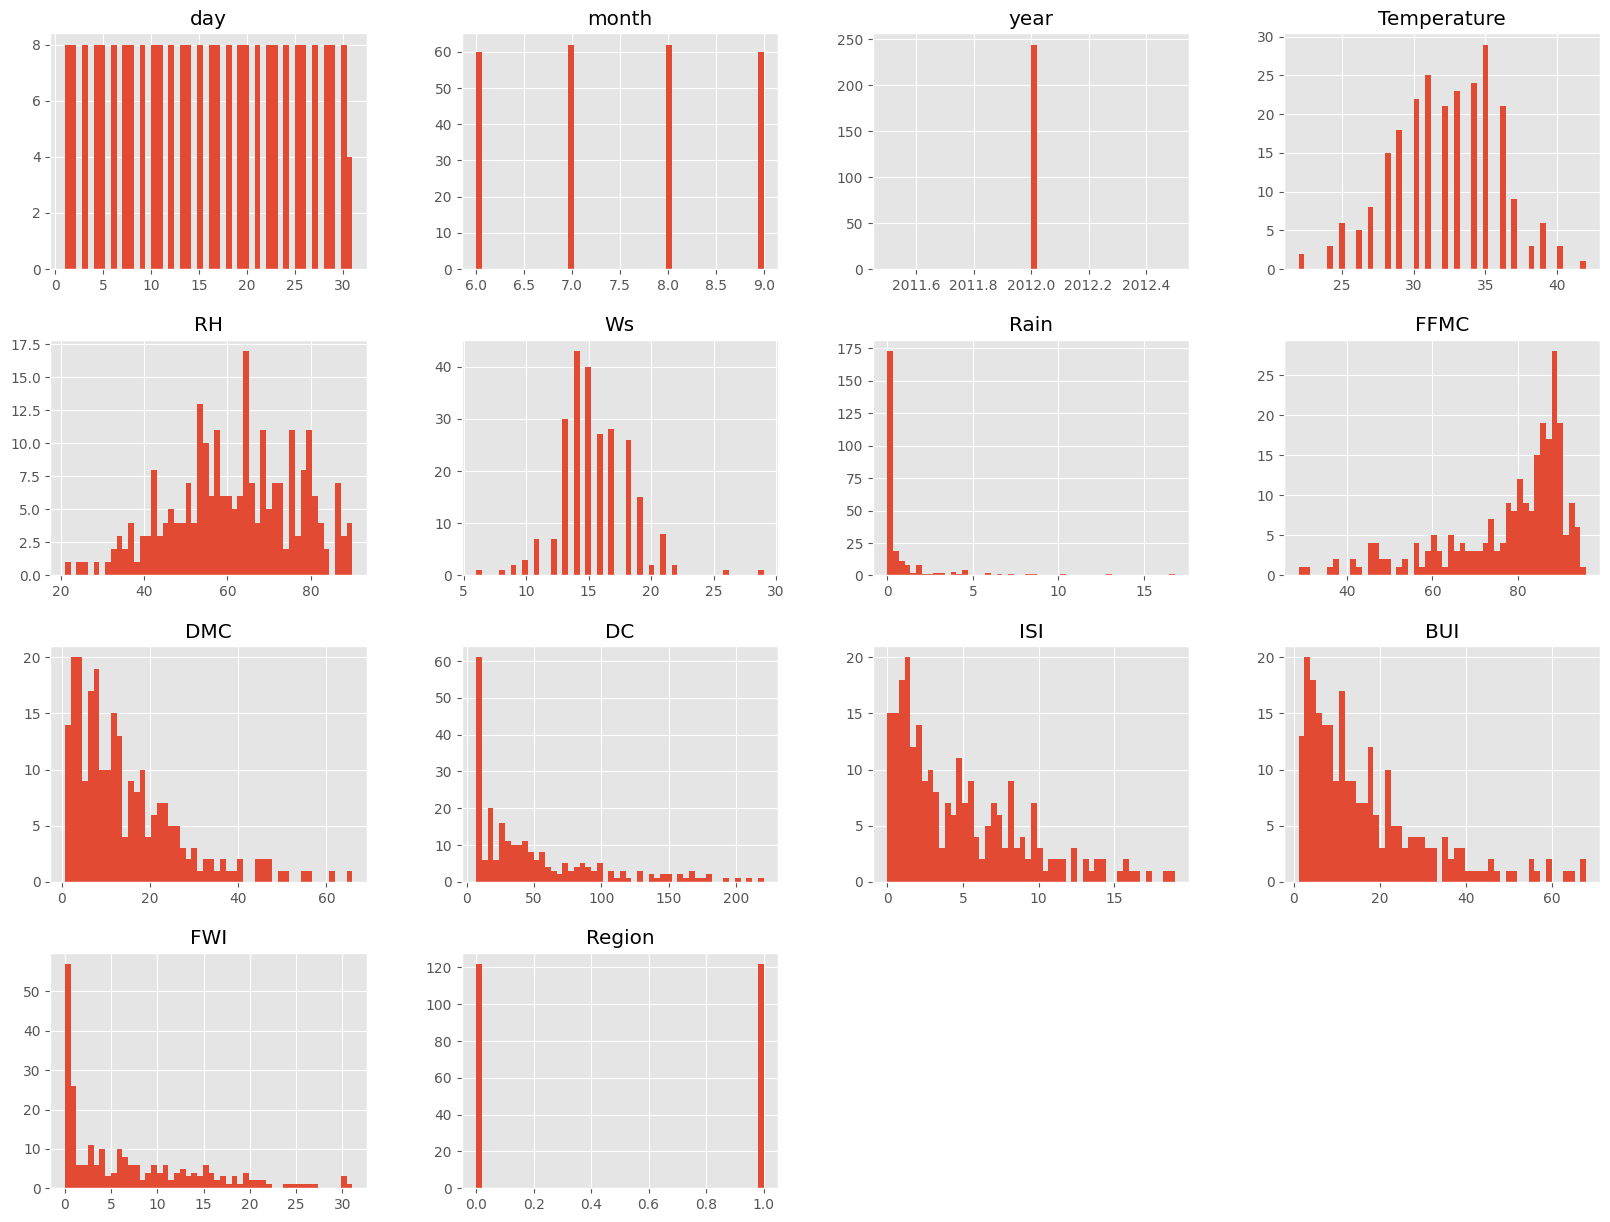

In [40]:
#plot density plot for all features 
plt.style.use('ggplot')
df.hist(bins= 50,figsize=(20,15))
plt.show()

In [41]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  244 non-null    int64  
 1   RH           244 non-null    int64  
 2   Ws           244 non-null    int64  
 3   Rain         244 non-null    float64
 4   FFMC         244 non-null    float64
 5   DMC          244 non-null    float64
 6   DC           243 non-null    float64
 7   ISI          244 non-null    float64
 8   BUI          244 non-null    float64
 9   FWI          243 non-null    float64
 10  Classes      244 non-null    int64  
 11  Region       244 non-null    int64  
dtypes: float64(7), int64(5)
memory usage: 23.0 KB


In [42]:
#percentage for pie chart 
percentage = df_copy['Classes'].value_counts(normalize=True)*100


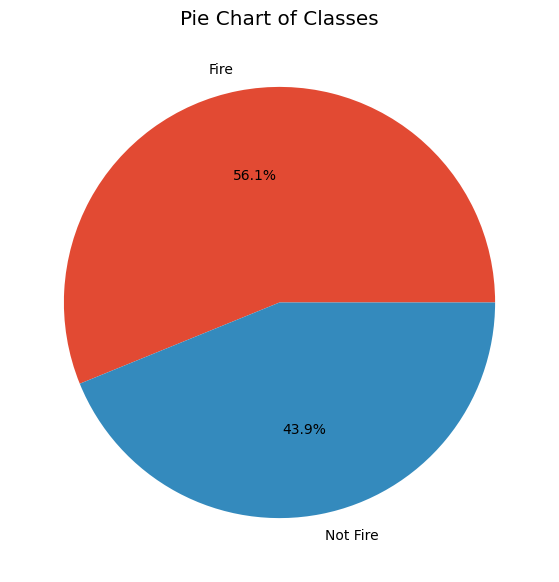

In [43]:
#plotting pie chart 
claslabels = ["Fire","Not Fire"]
plt.figure(figsize=(12,7))
plt.pie(percentage,labels= claslabels,autopct='%1.1f%%')
plt.title("Pie Chart of Classes")
plt.show()

In [44]:
print(df_copy.dtypes)


Temperature      int64
RH               int64
Ws               int64
Rain           float64
FFMC           float64
DMC            float64
DC             float64
ISI            float64
BUI            float64
FWI            float64
Classes          int64
Region           int64
dtype: object


In [45]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.376284,0.607551,0.455504,0.566670,0.506575,0.273496
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.226941,-0.690637,-0.348587,-0.580957,-0.420695,-0.406424
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.079135,0.015248,0.029756,0.032368,-0.073810,-0.176829
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.298023,-0.347105,-0.299171,-0.324422,-0.376727,-0.041080
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.507397,0.739730,0.589652,0.691132,0.762942,0.224680
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875925,0.674499,0.982073,0.875864,0.584757,0.191094
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.607551,-0.690637,0.015248,-0.347105,0.739730,0.674499,0.508643,1.000000,0.635891,0.922895,0.719419,0.268421
BUI,0.455504,-0.348587,0.029756,-0.299171,0.589652,0.982073,0.941988,0.635891,1.000000,0.857973,0.586915,0.087370
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


<Axes: >

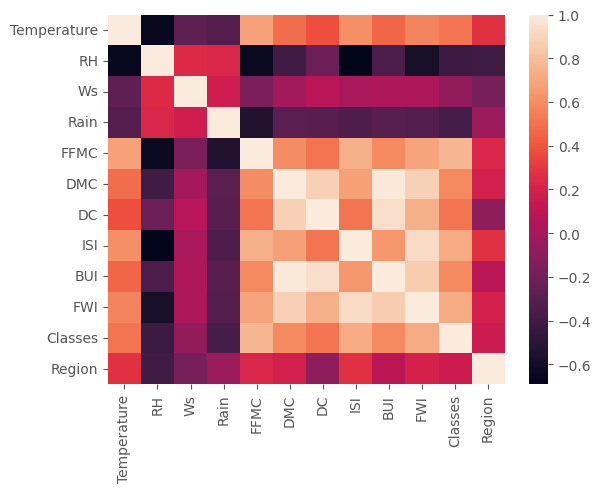

In [46]:
sns.heatmap(df_copy.corr())

<Axes: ylabel='FWI'>

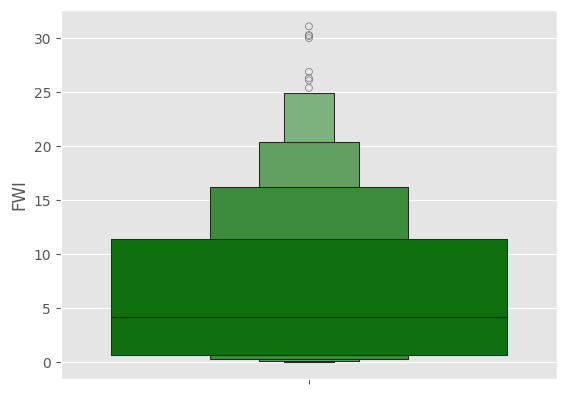

In [47]:
sns.boxenplot(df['FWI'],color='green')

In [48]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [49]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

Text(0.5, 1.0, 'Fire Analysis of Sidi - Bel Regions')

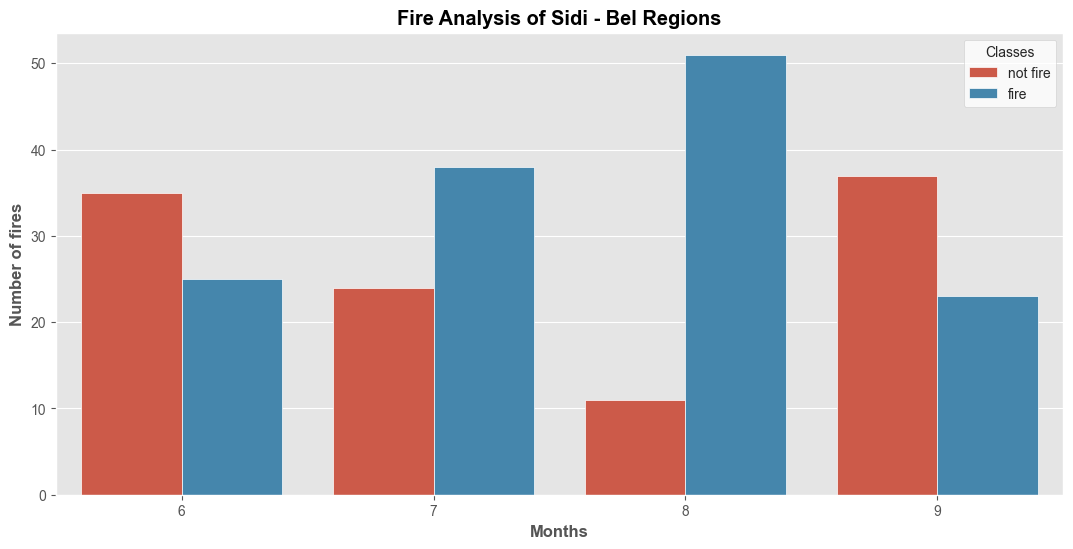

In [50]:
#Monthly Fire Analysis
dftemp = df.loc[df['Region']==1]
plt.subplots(figsize= (13,6))
sns.set_style('whitegrid')
sns.countplot(x = 'month',hue='Classes',data = df)
plt.ylabel('Number of fires', weight = 'bold')
plt.xlabel('Months',weight = 'bold')
plt.title("Fire Analysis of Sidi - Bel Regions", weight = 'bold')

August and September have most fired months 


Model Training

In [51]:
df = pd.read_csv("Algerian_forest_fires_cleaned_dataset.csv")

In [52]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [53]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [54]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [55]:
#Encoding
df['Classes'] = np.where(df['Classes'].str.contains("not fire"),0,1)

In [56]:
df.tail()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
239,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
240,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
241,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
242,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1
243,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0,1


In [57]:
df['Classes'].value_counts()

Classes
1    137
0    107
Name: count, dtype: int64

In [58]:
#dependent and independent features 
X = df.drop('FWI',axis=1)
y= df['FWI']

In [59]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0,0


In [60]:
y

0      0.5
1      0.4
2      0.1
3      0.0
4      0.5
      ... 
239    6.5
240    0.0
241    0.2
242    0.7
243    0.5
Name: FWI, Length: 244, dtype: float64

In [61]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [62]:
X_train.shape,X_test.shape

((183, 11), (61, 11))

In [63]:
X_train.corr() #those independent features which are highly correlated needs to eliminate one 

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.664492,-0.249312,-0.375047,0.703238,0.485379,0.382359,0.609525,0.458575,0.497642,0.256099
RH,-0.664492,1.000000,0.235766,0.262550,-0.637201,-0.398168,-0.224161,-0.694976,-0.344365,-0.409824,-0.397053
Ws,-0.249312,0.235766,1.000000,0.262759,-0.169489,-0.013533,0.077824,0.015384,0.022529,-0.088098,-0.229797
Rain,-0.375047,0.262550,0.262759,1.000000,-0.585018,-0.291338,-0.297747,-0.353219,-0.301347,-0.390676,-0.096985
FFMC,0.703238,-0.637201,-0.169489,-0.585018,1.000000,0.602278,0.513093,0.744270,0.592841,0.764879,0.237434
DMC,0.485379,-0.398168,-0.013533,-0.291338,0.602278,1.000000,0.877778,0.652894,0.981876,0.581484,0.197489
DC,0.382359,-0.224161,0.077824,-0.297747,0.513093,0.877778,1.000000,0.509652,0.941352,0.506701,-0.075591
ISI,0.609525,-0.694976,0.015384,-0.353219,0.744270,0.652894,0.509652,1.000000,0.624038,0.723184,0.267027
BUI,0.458575,-0.344365,0.022529,-0.301347,0.592841,0.981876,0.941352,0.624038,1.000000,0.587278,0.092548
Classes,0.497642,-0.409824,-0.088098,-0.390676,0.764879,0.581484,0.506701,0.723184,0.587278,1.000000,0.147674


<Axes: >

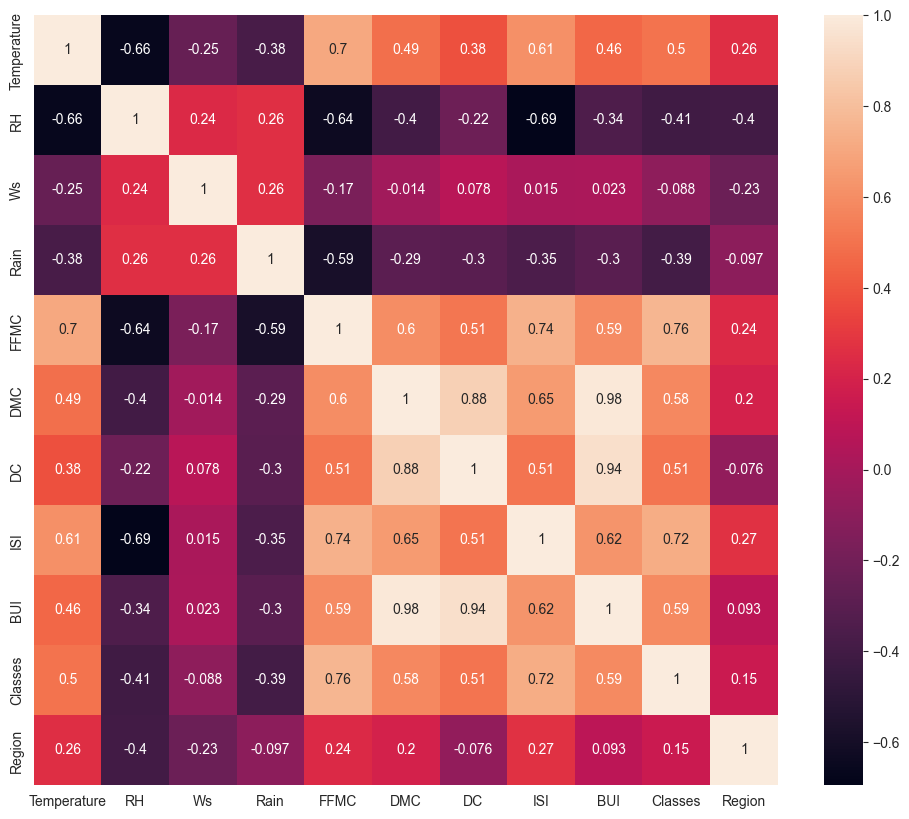

In [64]:
#check for multicollinearity
plt.figure(figsize=(12,10))
corr = X_train.corr()
sns.heatmap(corr,annot=True)

In [65]:
##fucntion for correlation 
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr            

In [66]:
#threshold
corr_features = correlation(X_train,0.85)

In [67]:
#drop the features when corr is greater than 0.85
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((183, 9), (61, 9))

Feature Scaling and Standardisation


In [68]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Apply fit_transform to the training data
X_train_scaled = scaler.fit_transform(X_train)

# Apply transform to the test data
X_test_scaled = scaler.transform(X_test)


In [69]:
X_test_scaled

array([[-2.75162156e-01,  9.51187672e-02, -2.28544571e-01,
        -3.81132246e-01,  6.38241722e-01, -4.01362602e-02,
         2.37573464e-01,  9.11043358e-01, -1.00547949e+00],
       [ 2.60525871e-01, -5.84831795e-01, -9.88974688e-01,
        -3.81132246e-01,  7.42136256e-01, -3.84555270e-01,
         4.06084874e-01,  9.11043358e-01, -1.00547949e+00],
       [ 2.60525871e-01, -9.92802132e-01,  1.51670488e-01,
        -3.81132246e-01,  7.00578442e-01, -5.44750158e-01,
         5.02377108e-01,  9.11043358e-01,  9.94550368e-01],
       [ 7.96213899e-01, -6.52826851e-01,  5.31885546e-01,
        -1.47707879e-01,  1.88032075e-01,  4.80497126e-01,
        -4.84618295e-01,  9.11043358e-01,  9.94550368e-01],
       [ 2.13543397e+00, -1.46876753e+00, -2.12961986e+00,
        -3.34447373e-01,  1.00533574e+00,  6.32682270e-01,
         1.15234969e+00,  9.11043358e-01,  9.94550368e-01],
       [ 1.86758995e+00,  9.51187672e-02, -2.50983492e+00,
         1.79086236e-01, -2.55251270e-01, -2.403798

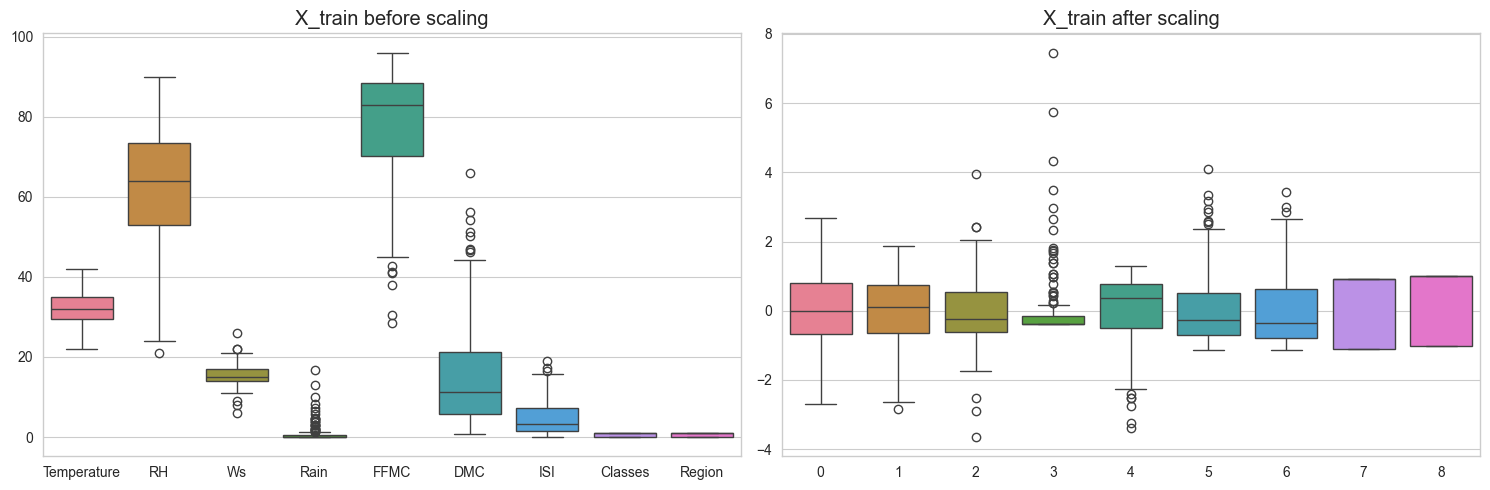

In [70]:
#box plot to understand the use of standard scaling 
# plt.subplots(figsize= (15,5))
# plt.Subplot(1,2,1)
# sns.boxplot(data = X_train)
# plt.title('X train before scaling')
# plt.Subplot(1,2,2)
# sns.boxplot(data = X_train_scaled)
# plt.title('X train after scaling')
# import matplotlib.pyplot as plt
# import seaborn as sns

# Box plot to understand the effect of standard scaling
plt.figure(figsize=(15, 5))

# Plot 1: Before scaling
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
sns.boxplot(data=X_train)
plt.title('X_train before scaling')

# Plot 2: After scaling
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
sns.boxplot(data=X_train_scaled)
plt.title('X_train after scaling')

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


Linear Regression Model 

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linearreg = LinearRegression()
linearreg.fit(X_train_scaled,y_train)
y_pred = linearreg.fit(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test,y_pred)
print("mean absolute error ",mae)
print("R2 score ",score)
plt.scatter(y_test,y_pred)

ValueError: Input y contains NaN.

In [73]:
import numpy as np

# Remove rows with NaN values in y_train
non_nan_indices = ~np.isnan(y_train)
X_train_scaled = X_train_scaled[non_nan_indices]
y_train = y_train[non_nan_indices]

# Fit the model
linearreg = LinearRegression()
linearreg.fit(X_train_scaled, y_train)


LinearRegression()

Mean Absolute Error: 0.5515804234566085
R^2 Score: 0.9903516167718194


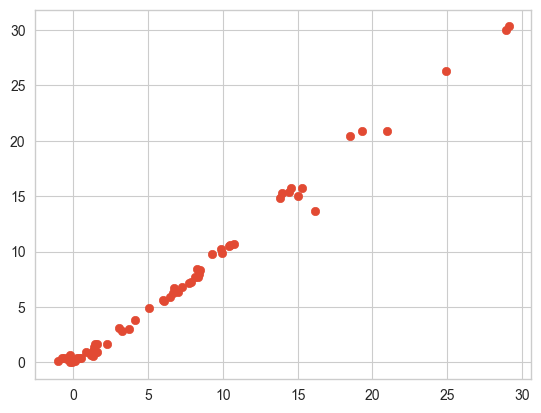

In [74]:

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Create an instance of LinearRegression
linearreg = LinearRegression()

# Fit the model on the scaled training data
linearreg.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = linearreg.predict(X_test_scaled)

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the R^2 Score
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

plt.scatter(y_pred,y_test)


Lasso Regression

Mean Absolute Error: 0.7312873225565103
R^2 Score: 0.9857700165367234


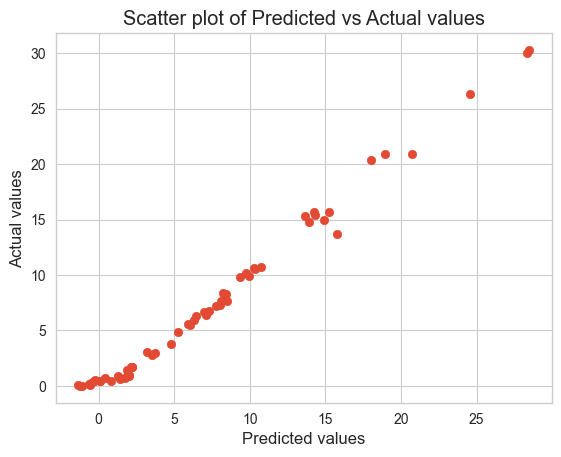

In [75]:
from sklearn.linear_model import Lasso  # Correct import
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Initialize the Lasso model with regularization parameter (alpha)
lasso = Lasso(alpha=0.1)  # You can adjust alpha as needed

# Fit the model on the scaled training data
lasso.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = lasso.predict(X_test_scaled)

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the R^2 Score
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

# Scatter plot to compare predictions and actual values
plt.scatter(y_pred, y_test)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Scatter plot of Predicted vs Actual values")
plt.show()


Cross Validation Lasso

In [76]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)
#cross validation is train test with more accuracy (avg of accuracies)

LassoCV(cv=5)

In [77]:
lassocv.alpha_

np.float64(0.02513563683920788)

In [78]:
lassocv.alphas

mean_absolute_error 0.592550971056948
R2 score 0.9895671408755963


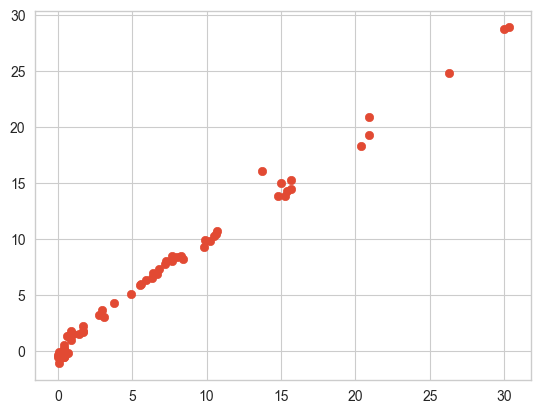

In [79]:
y_pred = lassocv.predict(X_test_scaled)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print("mean_absolute_error",mae)
print("R2 score",score)

Ridge Regression 

Mean Absolute Error: 0.5539095453218036
R^2 Score: 0.9902866819028885


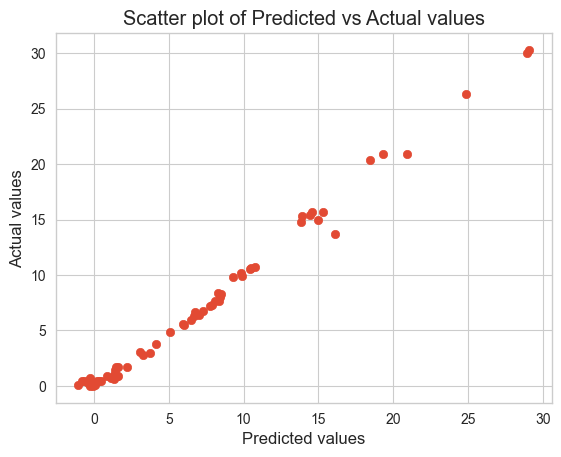

In [80]:
from sklearn.linear_model import Ridge  # Correct import
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# Initialize the Lasso model with regularization parameter (alpha)
ridge = Ridge(alpha=0.1)  # You can adjust alpha as needed

# Fit the model on the scaled training data
ridge.fit(X_train_scaled, y_train)

# Predict on the scaled test data
y_pred = ridge.predict(X_test_scaled)

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)

# Calculate the R^2 Score
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R^2 Score: {r2}")

# Scatter plot to compare predictions and actual values
plt.scatter(y_pred, y_test)
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("Scatter plot of Predicted vs Actual values")
plt.show()


In [81]:
ridge.get_params()

{'alpha': 0.1,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'positive': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.0001}

Elasticnet Regression 

Mean absolute error 1.91345427429483
R2 Score 0.8774707232154917
Mean absolute error 0.6101524170233819
R2 Score 0.9889645238582832


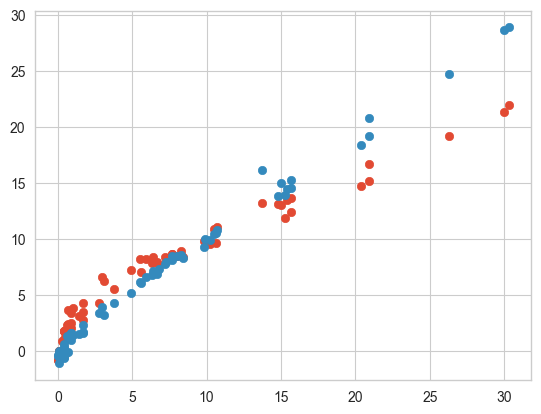

In [82]:
# Importing necessary libraries                 #Elasticnet is combi of lasso and ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Creating the ElasticNet model
elastic = ElasticNet()
elastic.fit(X_train_scaled, y_train)
y_pred = elastic.predict(X_test_scaled)

# Calculating evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

# Printing results
print("Mean absolute error", mae)
print("R2 Score", score)

# Plotting results
plt.scatter(y_test, y_pred)

# ElasticNet with cross-validation
from sklearn.linear_model import ElasticNetCV

elasticcv = ElasticNetCV(cv=5)
elasticcv.fit(X_train_scaled, y_train)
y_pred = elasticcv.predict(X_test_scaled)

# Plotting and printing results
plt.scatter(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

In [83]:
elasticcv.alphas

Pickling the Machine Learning Model 

In [84]:
ridge

Ridge(alpha=0.1)

In [85]:
scaler

StandardScaler()

In [88]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))